## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнила: Бир Анастасия Павловна

### Общая информация

__Дата выдачи:__ 11.02.2020

__Дедлайн:__ 21.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}}) + \min(2, s_{\text{matplotlib}})\right) \times 10 / 23,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. За каждую задачу сверх обязательных (9 в первой части, 12 во второй и 2 в третьей) дается 0.5 бонусных балла. Таким образом, за это домашнее задание можно получить 2 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

In [1]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [2]:
def result_mark(weights: np.array, marks: np.array) -> int:
    return int((weights * marks).sum())

In [3]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [4]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [5]:
def change_array(array: np.array, number: int) -> np.array:
    array[::3] = number
    return array

In [6]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [7]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [8]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    n = array1 - array2
    result = np.where((n < precision) & (n > -precision))[0]
    return result

In [9]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [10]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [11]:
def block_matrix(block: np.array) -> np.array:
    return np.concatenate([np.concatenate([block, block], axis=1), np.concatenate([block, block], axis=1)])

In [12]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [13]:
def diag_prod(matrix: np.array) -> int:
    diagonal = matrix.diagonal()
    return np.multiply.reduce(diagonal[diagonal != 0])

In [14]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [18]:
def normalize(matrix: np.array) -> np.array:
    mean_col = np.mean(matrix, axis=0)
    std_col = np.std(matrix, axis=0)
    std_col[std_col == 0] = 1
    return (matrix - mean_col)/std_col

In [19]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [20]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [21]:
def antiderivative(coefs: np.array) -> np.array:
    shape = len(coefs)
    new_indexes = np.arange(1, shape+1)[::-1]
    new_indexes = np.append(new_indexes, 1)
    a = np.append(arr=coefs, values =[0])
    return np.divide(a, new_indexes)

In [22]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [23]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [24]:
def make_symmetric(matrix: np.array) -> np.array:
    n = len(matrix)
    i_lower = np.tril_indices(n, -1)
    matrix[i_lower] = matrix.T[i_lower]
    return matrix

In [25]:
matrix = np.array([[1, 2, 3, 4], 
                   [0, 5, 6, 7], 
                   [0, 0, 8, 9], 
                   [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [26]:
matrix = np.array([[10, 21, 32, 49], 
                   [0, 53, 62, 78], 
                   [0, 0, 82, 92], 
                   [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [27]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    matrix = np.zeros((m, b - a + 1))
    indexes = np.arange(m)
    matrix[indexes] = np.arange(a, b + 1)
    return matrix

In [28]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [29]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [30]:
from numpy.linalg import norm

In [31]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    return np.dot(vec1, vec2)/(norm(vec1)*norm(vec2))

In [32]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [33]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [35]:
df = pd.read_csv('train.csv')

In [36]:
df.shape

(891, 12)

In [37]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


###  12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [39]:
df[['Survived']].mean()

Survived    0.383838
dtype: float64

In [40]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [41]:
df.groupby(['Pclass']).agg({'PassengerId':'count'})

,PassengerId
Pclass,
1,216
2,184
3,491


In [42]:
df[df['Pclass'] == 3].groupby(['Pclass', 'Sex']).agg({'PassengerId':'count'})

PassengerId
Pclass Sex                
3      female          144
       male            347

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [43]:
df['Fare'].min()

0.0

In [44]:
df['Fare'].mean()

32.2042079685746

In [45]:
df['Fare'].max()

512.3292

In [46]:
df[df['Embarked'] == 'S']['Fare'].min()

0.0

In [47]:
df[df['Embarked'] == 'S']['Fare'].mean()

27.07981180124218

In [48]:
df[df['Embarked'] == 'S']['Fare'].max()

263.0

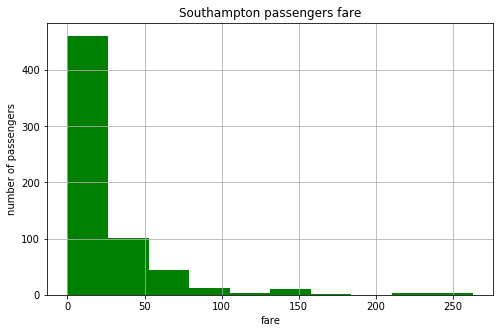

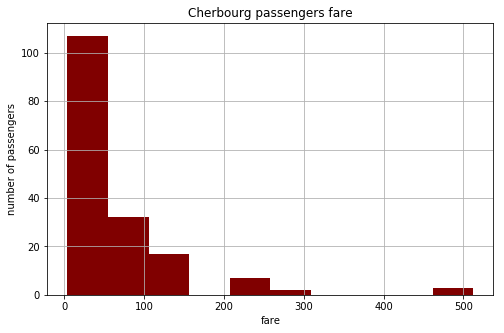

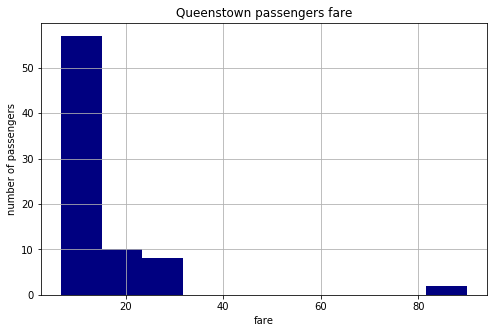

In [49]:
plt.figure(figsize=(8,5))
plt.title('Southampton passengers fare')
df[df['Embarked'] == 'S']['Fare'].hist(color='green')
plt.xlabel('fare')
plt.ylabel('number of passengers')
plt.show()

plt.figure(figsize=(8,5))
plt.title('Cherbourg passengers fare')
df[df['Embarked'] == 'C']['Fare'].hist(color='maroon')
plt.xlabel('fare')
plt.ylabel('number of passengers')
plt.show()

plt.figure(figsize=(8,5))
plt.title('Queenstown passengers fare')
df[df['Embarked'] == 'Q']['Fare'].hist(color='navy')
plt.xlabel('fare')
plt.ylabel('number of passengers')
plt.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [50]:
df.drop(columns=['Name'], inplace=True)

In [51]:
df.drop(columns=['Ticket'], inplace=True)

In [52]:
df.drop(columns=['Cabin'], inplace=True)

In [53]:
df.replace({'male': 1, 
            'female': 0}, inplace=True)

In [54]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [55]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [56]:
df = df.set_value(df['Age'].isna(), 'Age', df['Age'].mean()).copy()

/Users/anastasiyabir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


In [57]:
df = df.set_value(df['Embarked'].isna(), 'Embarked', 'S').copy()

/Users/anastasiyabir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [58]:
df[['Fare','Age']].corr()['Fare']['Age']

0.09156609328505784

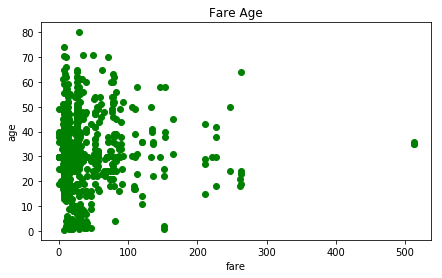

In [59]:
plt.figure(figsize=(7,4))
plt.title('Fare Age')
x = df['Fare']
y = df['Age']
plt.scatter(x, y, color='green')
plt.xlabel('fare')
plt.ylabel('age')
plt.show()

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [60]:
df[['Fare','Survived']].corr()['Fare']['Survived']

0.2573065223849618

In [61]:
df.groupby(['Survived']).agg({'Fare':'mean'})

,Fare
Survived,
0,22.117887
1,48.395408


In [62]:
df[['Pclass','Survived']].corr()['Pclass']['Survived']

-0.33848103596101586

In [63]:
df[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [64]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [65]:
def age_class(age):
    if age > 60:
        return 0
    elif (age < 60) & (age >= 45):
        return 1
    elif (age < 45) & (age >= 30):
        return 2
    elif (age < 30) & (age >= 18):
        return 3
    elif age < 18:
        return 4

In [66]:
df['Age_class'] = df.apply(lambda x: age_class(x['Age']), axis=1)

In [67]:
df['Age_class'].value_counts().sort_values()

0.0     22
1.0     89
4.0    113
2.0    215
3.0    448
Name: Age_class, dtype: int64

In [68]:
df.groupby(['Age_class'])[['Survived']].mean()

,Survived
Age_class,
0.0,0.227273
1.0,0.404494
2.0,0.423256
3.0,0.328125
4.0,0.539823


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [69]:
df_2 = pd.read_csv('train.csv')

In [70]:
df_2['Surname'] = df_2.apply(lambda x: x['Name'].split(',')[0], axis=1)

In [71]:
df_2['Surname'].value_counts().head(1)

Andersson    9
Name: Surname, dtype: int64

In [73]:
def is_child(age):
    if age < 18:
        return 1
    else:
        return 0

In [74]:
df_2['is_child'] = df.apply(lambda x: is_child(x['Age']), axis=1)

In [76]:
df_2[['is_child']].mean()

is_child    0.126824
dtype: float64

In [77]:
del df_2

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

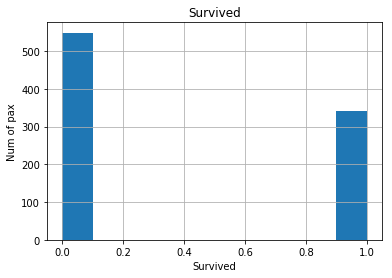

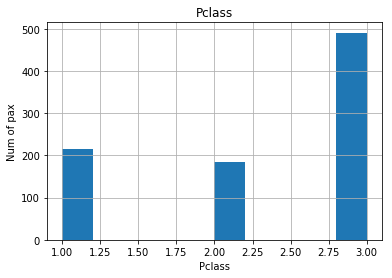

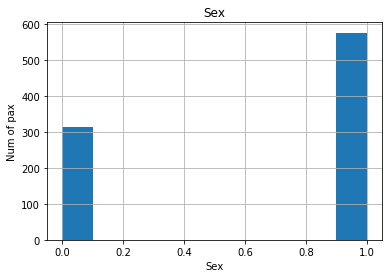

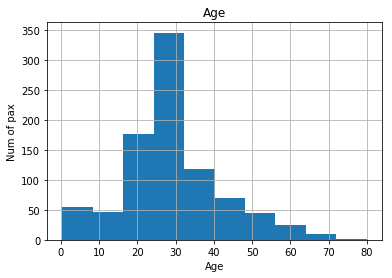

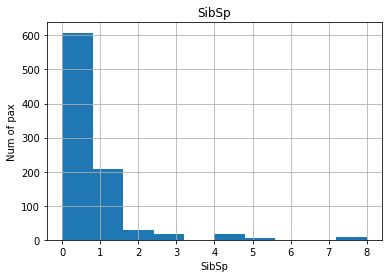

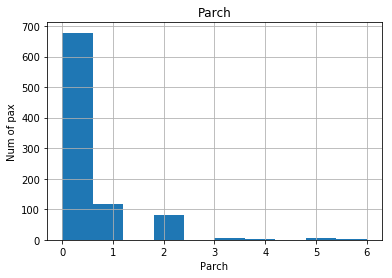

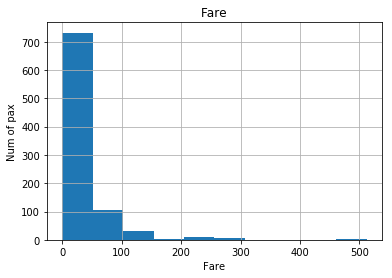

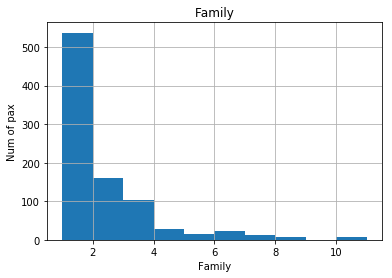

In [102]:
for row in ['Survived', 'Pclass','Sex','Age','SibSp','Parch','Fare','Family']:
    plt.xlabel(row)
    plt.ylabel("Num of pax")
    plt.title(row)
    df[row].hist()
    plt.show()

In [104]:
from sklearn import preprocessing
numerics = df.select_dtypes(exclude=['object'])
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(numerics)
df_normalized = pd.DataFrame(np_scaled)

/Users/anastasiyabir/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [110]:
df_normalized.columns = numerics.columns

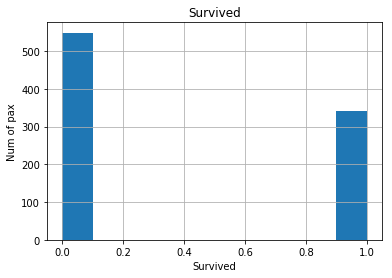

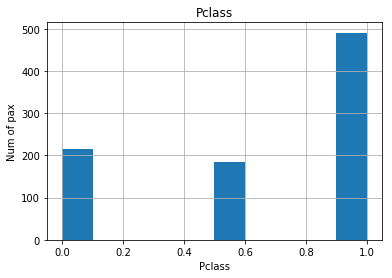

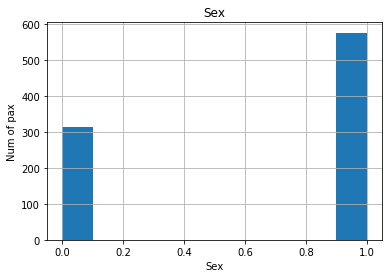

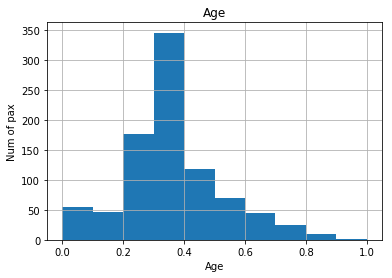

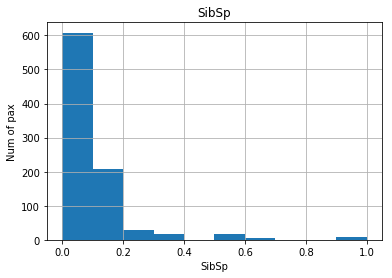

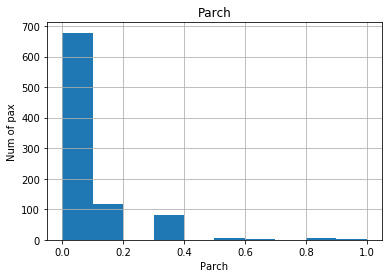

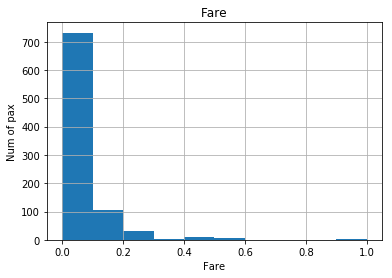

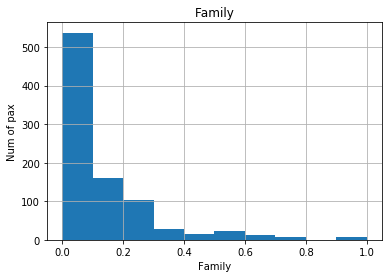

In [111]:
for row in ['Survived', 'Pclass','Sex','Age','SibSp','Parch','Fare','Family']:
    plt.xlabel(row)
    plt.ylabel("Num of pax")
    plt.title(row)
    df_normalized[row].hist()
    plt.show()

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [115]:
df.replace({'S': 1, 
            'C': 2,
            'Q': 3}, inplace=True)

# Часть 3. Matplotlib

### 25

Отобразите гистограмму распределения возрастов для каждого класса пассажиров. В результате вы должны получить три гистограммы, которые необходимо отобразить друг рядом с другом, используя функцию `plt.subplots`. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры `figsize`, `sharey` функции `plt.subplots`. Также полезными могут оказаться параметры `bins`, `ec`, `density` функции `plt.hist`, а также функции `set_xlabel`, `set_ylabel`, `set_title` и `plt.tight_layout`.

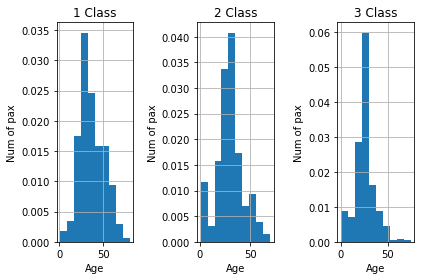

In [188]:
fig = plt.figure()
for row in [1,2,3]:
    plt.subplot(1, 3, row)
    plt.xlabel('Age')
    plt.ylabel("Num of pax")
    plt.title(str(row) + ' Class')
    df[df['Pclass'] == row]['Age'].hist(density=True)
    plt.tight_layout()
plt.show()

### 26

Нарисуйте график косинуса для `x` от `-1` до `5`. Также пунктирной линией изобразите график синуса для `x` на том же промежутке. Укажите на графике легенду.

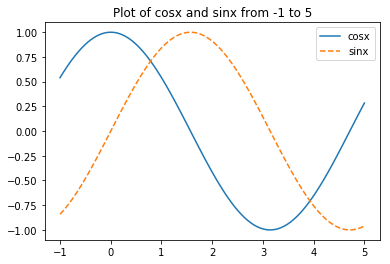

In [206]:
x = np.linspace(-1, 5, 100)
plt.title('Plot of cosx and sinx from -1 to 5')
plt.plot(x, np.cos(x))
plt.plot(x, np.sin(x),'--')
plt.legend(['cosx', 'sinx'])
plt.show()

### 27

Постройте диаграмму рассеяния (scatter plot) для пассажиров. Ось x должна обозначать возраст пассажира, ось y - стоимость его проезда. Обозначьте выживших и погибших пассажиров разными светами и маркерами. Также укажите на графике легенду.

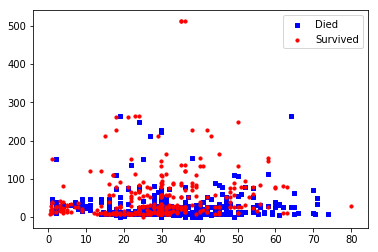

In [228]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df[df['Survived'] == 0]['Age'], df[df['Survived'] == 0]['Fare'], s=10, c='b', marker="s", label='Died')
ax1.scatter(df[df['Survived'] == 1]['Age'], df[df['Survived'] == 1]['Fare'], s=10, c='r', marker="o", label='Survived')
ax1.legend()